# **Visualization of the Orbit of Space Debris Around the Earth**

In [4]:
# requests kütüphanesi, Python dünyasında HTTP istekleri yapmak için kullanılan kütüphanelerden biridir. 
# İnternette veri çekmek, API’lerle çalışmak veya web sayfalarına veri göndermek gibi işleri kolaylaştırır.
import requests
from collections import OrderedDict

In [5]:
# Create a Account on Space-Track.org to reach TLE's of objects around Earth
# Enter your account info here, it's safe, don't worryy
USERNAME = "denizbenilde@gmail.com" #Create a Account on Space-Track.org to reach TLE's of objects around Earth
PASSWORD = "3103denizgunay3103"

# [TR]
# Session() ile bir oturum oluşturuyoruz.
# Bu şekilde Cookie’ler ve giriş bilgileri aynı oturumda saklanabiliyor ve tekrar giriş yapmamıza gerek kalmıyor.
session = requests.Session()


In [6]:
# login_url: Giriş yapılacak sitenin login endpoint’i (yani kullanıcı adı ve şifreyi alan URL).
# payload: Siteye gönderilecek veriler (form datası).
# "identity" → kullanıcı adı veya email alanı.
# "password" → şifre alanı.

# Login
login_url = "https://www.space-track.org/ajaxauth/login"
payload = {"identity": USERNAME, "password": PASSWORD}

# post():
# HTTP POST isteği yapar. Web sitelerine veri göndermek için kullanılır.
# data=payload → POST isteği ile form verilerini gönderir.
session.post(login_url, data=payload)

<Response [200]>

## **Theoretical Background 1**

**SIDEREAL DAY** <br>
Sidereal day = Dünya’nın yıldızlara göre bir tam dönüş süresi demektir. <br>
(Dünya dönerken gökyüzünde gördüğümüz spesifik bir yıldızın, dönüş sonunda aynı konuma gelmesi.) <br>
Güneş'in her gün öğle vaktinde tam tepeye gelmesi gibi. <br>
- Dünya kendi ekseni etrafında dönerken Güneş’e göre değil, **uzaktaki yıldızlara göre** bir tam dönüş yapacak şekilde ölçülür.  
- Yıldızlara göre bir tam dönüş süresi **23 saat 56 dakika 4 saniyedir (≈ 86164 s)**.  
- Bu süre, **Güneş gününden (24 saat)** biraz daha kısadır; çünkü Dünya bir yandan da Güneş etrafında dolanır.  
  - Bu yüzden Güneş’in Dünya için tekrar aynı konuma gelmesi daha uzun sürer.  
  - Dünya'nın bir tam dönüş **+ biraz daha fazla** dönmesi gerekir.

Türlere Göre Gün Uzunlukları

| Tür            | Süre        | Neden? |
|----------------|-------------|--------|
| **Sidereal day** | 23h 56m       | Yıldızlar sabit → 360° dönmen yeter |
| **Solar day**    | 24h           | Dünya yörüngede ilerledi → 360° + ~1° dönmen gerekir |

Dünya’nın yıldız günündeki (sidereal day) dönüş süresi
- **23h 56m = 86164 s**
- **24 h = 84000 s**

**MEAN MOTION**<br>
Mean motion (n), bir uydunun ortalama açısal hızıdır.<br>
📌“Uydu bir günde kaç kez tam tur atıyor?” - Birimi: *rev/day* <br>
📌“Uydu saniyede ne kadar açı tarıyor?" - Birimi: *rad/s*

TLE Formatına Göre (rev/day)
TLE’de mean motion, **günde devir (rev/day)** cinsinden verilir: (Bu yüzden 1 gündeki saniyeyi perioda böleriz)
$$
n_{\text{rev/day}} = \frac{86400}{T}
$$


---
Uydunun mean motion'ı:
$$
n = \sqrt{\frac{\mu}{a^3}}
$$

- **n:** açısal hız (rad/s)  
- **a:** yarı büyük eksen (m veya km)  
- **Yerçekimi Parametresi (μ)**  
μ = 3.986004418 ×  10¹⁴  m³/s²  
(veya 398600.4418 km³/s²)

- **G (Yerçekimi Sabiti):**  
  G = 6.67430 × 10⁻¹¹ m³·kg⁻¹·s⁻²

- **M (Dünya Kütlesi):**  
  M = 5.9722 × 10²⁴ kg

- **GM = μ doğrulaması:**  
  G × M = μ = 3.986004418 ×  10¹⁴  m³/s²



TLE birimi: **rev/day**

TLE’de mean motion, rev/day cinsindedir:

$$
n_{\text{rev/day}} = n \cdot \frac{86400}{2\pi}
$$

---

### GEO Mean Motion (1.0027 rev/day)

GEO yarıçapı:

$$
a = 42164\ \text{km}
$$

Rad/s:

$$
n = \sqrt{\frac{398600.4418}{42164^3}}
= 7.292115 \times 10^{-5}\ \text{rad/s}
$$

rev/day:

$$
n_{\text{rev/day}} =
7.292115 \times 10^{-5}
\cdot \frac{86400}{2\pi}
\approx 1.0027\ \text{rev/day}
$$

---

### LEO Mean Motion (≈14–16 rev/day)
| Yükseklik                                | Tipik Mean Motion (rev/day) | Açıklama                        |
| ---------------------------------------- | --------------------------- | ------------------------------- |
| **160 km** (en alçak kararlı yörüngeler) | **~16 rev/day**             | Atmosferik sürtünme çok yüksek |
| **300–500 km** (ISS, Starlink tarzı)     | **~15–16 rev/day**          | Çoğu LEO uydu bu aralıkta       |
| **600–800 km**                           | **~14.5–15 rev/day**        | EO uyduları (Sentinel, Landsat) |
| **1000–1200 km**                         | **~13–14 rev/day**          | Polar gözlem uyduları           |
| **~2000 km (LEO sınırı)**                | **~11.2 rev/day**           | LEO → MEO sınırı                |




400 km yükseklikte LEO:

$$
a = 6378 + 400 = 6778\ \text{km}
$$

Rad/s:

$$
n = \sqrt{\frac{398600.4418}{6778^3}}
\approx 0.00113\ \text{rad/s}
$$

rev/day:

$$
n_{\text{rev/day}} =
0.00113 \cdot \frac{86400}{2\pi}
\approx 14.4\ \text{rev/day}
$$

---

### MEO (GPS) Mean Motion ≈ 2 rev/day

$$
a = 26560\ \text{km}
$$

Rad/s:

$$
n = \sqrt{\frac{398600.4418}{26560^3}}
= 1.454 \times 10^{-4}\ \text{rad/s}
$$

rev/day:

$$
n_{\text{rev/day}} =
1.454 \times 10^{-4}
\cdot \frac{86400}{2\pi}
\approx 2.00\ \text{rev/day}
$$

---

In [7]:
# LEO'da dönen uyduların bilgilerini alalım.
# https://www.space-track.org/basicspacedata/query/ → Space-Track API’nin temel veri sorgulama adresi.
# class/tle_latest/ → En son TLE (Two-Line Element) verilerini aldık böylece.
# ORDINAL/1/ → En son kaydı al (1 tane).
# NORAD_CAT_ID/>0/ → Sadece geçerli NORAD kimliği olan nesneleri seç.
# EPOCH/>now-30/ → Son 30 gün içinde gözlemlenmiş uydular.
# MEAN_MOTION/>11/ → LEO uyduları için yaklaşık bir filtre.
# MEAN_MOTION, bir uydunun bir gün içinde yaptığı dönüş sayısıdır.
# 11 rev/day üzeri, alçak yörüngede (LEO) olduğunu gösterir.
# format/tle → Çıktıyı TLE formatında almak istiyoruz.

# LEO sınıfı için TLE çekme (örnek: sadece enkaz, DECAY=0)
tle_url = (
    "https://www.space-track.org/basicspacedata/query/"
    "class/tle_latest/ORDINAL/1/"
    "NORAD_CAT_ID/>0/"
    "EPOCH/>now-30/"
    "MEAN_MOTION/>11/"    # LEO (yaklaşık > 11 rev/day)
    "format/tle"
)

response = session.get(tle_url)
tle_text = response.text
print(tle_text)


1 00011U 59001A   25327.49227286  .00000424  00000-0  21279-3 0  9990
2 00011  32.8697 143.4421 1448181 326.5642  25.1155 11.90129023510950
1 00012U 59001B   25327.94589960  .00001350  00000-0  79392-3 0  9999
2 00012  32.8962 228.5383 1647381  98.3017 280.6906 11.48335676507720
1    20U 59007A   25328.24685744  .00002377  00000-0  95939-3 0  9990
2    20  33.3426 284.6884 1639477  35.0653 334.7601 11.61519730460776
1    22U 59009A   25328.41451932  .00009977  00000-0  38830-3 0  9993
2    22  50.2660  28.7535 0086146  20.3298 340.1056 15.23197615769072
1 00029U 60002B   25328.30795142  .00000821  00000-0  14029-3 0  9990
2 00029  48.3787 278.0632 0021886 106.2788 254.0535 14.78368154511812
1 00045U 60007A   25327.96033690  .00000362  00000-0  11264-3 0  9995
2 00045  66.6914 182.9946 0254788 307.9980  49.8355 14.35759323350589
1    46U 60007B   25328.43953295  .00000865  00000-0  18186-3 0  9999
2    46  66.6893  66.2570 0188380  87.1492 275.1161 14.54428610427220
1 00047U 60007C   25

In [8]:
# GEO sınıfı için TLE çekme (örnek: sadece aktif/enkaz fark etmeksizin)
# GEO için beklenen teorik değer 1.0027 rev/daydir, çünkü Jeosenkron yörüngenin periyodu Dünya’nın sideral dönüş hızına uymalıdır.
# Dünya’nın sideral günü 24 saat ≈ 86164 saniye
# Bir gün = 24 saat → 24 saat × 60 dakika = 1440 dakika
# Mean motion = 1440 / 86164 ≈ 1.0027 rev/day
# Ancak aşağıdaki etkiler yüzünden gerçek uydular 1.00–1.01 aralığında oynar: 


# Gerçek Geo objelerinin inclination = 0 olur. 5 dereceden küçük olanları bastırabiliriz.
tle_url_geo2 = (
    "https://www.space-track.org/basicspacedata/query/"
    "class/tle_latest/ORDINAL/1/"
    "NORAD_CAT_ID/>0/"
    "EPOCH/>now-30/"
    "MEAN_MOTION/>0.99/"   # Geo objects alt limit
    "MEAN_MOTION/<1.01/"   # Geo object üst limit
    "INCLINATION/<10/"      # Daha iyi GEO ayrımı
    "format/tle"
)

response = session.get(tle_url_geo2)
tle_text_geo2 = response.text
print(tle_text_geo2)



1 00858U 64047A   25325.94593318  .00000075  00000-0  00000-0 0  9993
2 00858   6.4596  66.6170 0005421 168.4374 174.0704  1.00328200 51380
1  1317U 65028A   25328.21498619 -.00000262  00000-0  00000+0 0  9993
2  1317   6.6578  65.8093 0008749 152.8863 219.5163  1.00214572125128
1 02608U 66110A   25327.81981116 -.00000318  00000-0  00000-0 0  9997
2 02608   4.4588  71.8809 0007880 181.2839 208.5603  1.00384764132749
1  2639U 67001A   25328.22477961 -.00000090  00000-0  00000+0 0  9991
2  2639   2.7264  79.4093 0009280 187.9701 224.1360  1.00230620117198
1 02717U 67026A   25328.15553251  .00000000  00000-0  00000-0 0  9995
2 02717   3.5730  69.1907 0020185 214.1213 193.7842  1.00289504121848
1  2969U 67094A   25328.34056697  .00000146  00000-0  00000+0 0  9992
2  2969   3.5548  76.3239 0013734 145.7475 175.2998  1.00345030113253
1  3029U 67111A   25328.34914703 -.00000068  00000-0  00000+0 0  9995
2  3029   2.6505  80.7536 0014605  32.8423 330.3585  1.00271614212588
1  3334U 68063A   25

## **Theoretical Background 2**

Örnek TLE: <br>
1  2608U 66110A   25326.82094911 -.00000316  00000-0  00000+0 0  9992 <br>
2  2608   4.4562  71.8895 0007878 181.1041 207.7496  1.00385234132730


**1  2608U 66110A   25326.82094911 -.00000316  00000-0  00000+0 0  9992** <br>

| Alan                     | Anlamı                              | Açıklama                                                                                   |
|--------------------------|-------------------------------------|--------------------------------------------------------------------------------------------|
| **1**                    | TLE satır numarası                  | Karakter 1 → Bu sadece TLE’nin birinci satırı olduğunu gösterir                             |
| **2608U**                | Uydu katalog numarası                | 2608 → NORAD katalog numarası <br> U → Parça kodu (Piece of launch)                        |
| **66110A**               | Fırlatma yılı – sıra numarası – parça | 66 → 1966 yılı <br> 110 → 110. fırlatma <br> A → Birincil yük                               |
| **25326.82094911**       | Epoch (zaman damgası)               | Bu TLE’nin geçerli olduğu UTC zamanı <br> 25 → 2025 yılı <br> 326.82094911 → yılın 326. günü, günün 0.82094911 kısmı <br> → 22 Kasım 2025 ~19:42 UTC |
| **-.00000316**           | Ortalama hareket türevi (drag etkisi) | Uydunun yörüngede günlük tur sayısının ilk türevi. <br> Atmosferik sürüklenme (drag) etkisi, GEO uydularında küçüktür. |
| **00000-0**               | İkinci türev (genelde sıfır)        | Her zaman 0’a yakındır                                                                    |
| **00000+0**               | B* (balistik katsayı)               | Sürüklenme katsayısı, GEO uydularında genelde 0                                           |
| **0**                     | Ephemeris türü                      | Her zaman 0 olarak bırakılır                                                              |
| **999**                   | Element set numarası                | TLE’nin versiyon numarası                                                                 |
| **2**                     | Checksum                             | Hata yakalamak için hesaplanan kontrol basamağı                                           |



**2  2608   4.4562  71.8895 0007878 181.1041 207.7496  1.00385234132730**

| Alan                     | Anlamı                                | Açıklama                                                                                 |
|--------------------------|---------------------------------------|------------------------------------------------------------------------------------------|
| **2**                    | Satır numarası                        | Bu TLE’nin ikinci satırı olduğunu gösterir.                                               |
| **2608**                  | NORAD ID                               | Birinci satırdakiyle aynı olmalıdır.                                                     |
| **4.4562**                | Inclination (Eğim)                     | Yörüngenin Dünya ekvatoruna göre eğimi → 4.45° (GEO uydularında düşük)                 |
| **71.8895**               | RAAN                                   | Yükselen düğümün sağ açıklığı → Yörüngenin Dünya’ya göre nasıl döndüğünü gösterir.        |
| **0007878**               | Eccentricity (Eksantriklik)           | 0.0007878 → Neredeyse mükemmel dairesel yörünge                                         |
| **181.1041**              | Argument of Perigee (Perige açısı)    | Yörüngenin Dünya’ya en yakın noktasının yönü                                             |
| **207.7496**              | Mean Anomaly                           | Uydunun o andaki yörüngedeki konumu                                                    |
| **1.00385234**            | Mean Motion                            | Uydunun günlük dönüş sayısı → 1.00385 rev/day ≈ 1 tur/gün → GEO yörüngesi              |
| **132730**                | Revolution Number                       | Fırlatıldığından beri tamamlanan tur sayısı                                             |



In [9]:
# Yukarıda elde ettiğimiz TLE'ler string formatındadır. Bu değerlere ulaşmamızı zorlaştırıyor.
# String -> Array dönüşümü yaparak daha kolay bir şekilde değerlere ulaşabiliriz.

#  .strip() baştaki ve sondaki boşlukları temizler.
#  .splitlines() metni her satırda böler → tek tek satırlar içeren bir liste elde edilir.
#  ÖRNEK:
# ['1 2608U ...', '2 2608 ...', '1 2639U ...', '2 2639 ...']

# Geçici depoloma dict oluşturuyoruz. objects_geo = {} -> anahtar-değer (key-value) çiftleri ile veri saklamak için.
# objnum = line1.split()[1]   # NORAD numarası yani 2608U --> GEOdaki objelerin (Uyduların ismidir) "keys()"

# Neden TLE verisini böyle saklıyoruz?
# TLE verisi her uydu için Line 1 ve Line 2 olarak iki satırdan oluşur.
# Her uydunun NORAD numarası benzersizdir ve bu veriyi tanımlamak için mükemmel bir kolaylık sağlar.
# Key (anahtar) → NORAD numarası ("33591", "40294")
# Value (değer) → Line 1 ve Line 2 satırlarını içeren bir dict
# Örnek:
# objects_geo = {
#    "33591": {"line1": "1 33591U ...", "line2": "2 33591 ..."},
#    "40294": {"line1": "1 40294U ...", "line2": "2 40294 ..."},
#}
#

In [11]:
tle_array_geo2 = tle_text_geo2.strip().splitlines()

def parse_line1(line):
    fields = OrderedDict()
    columns = [
        ("line_number", (0, 1)),
        ("satellite_number", (2, 7)),
        ("classification", (7, 8)),
        ("int_designator_year", (9, 11)),
        ("int_designator_launch", (11, 14)),
        ("int_designator_piece", (14, 17)),
        ("epoch_year", (18, 20)),
        ("epoch_day", (20, 32)),
        ("first_derivative", (33, 43)),
        ("second_derivative", (44, 52)),
        ("bstar", (53, 61)),
        ("ephemeris_type", (62, 63)),
        ("element_set_number", (64, 68))
    ]
    for name, (start, end) in columns:
        fields[name] = line[start:end].strip()
    return fields

def parse_line2(line):
    fields = OrderedDict()
    columns = [
        ("line_number", (0, 1)),
        ("satellite_number", (2, 7)),
        ("inclination", (8, 16)),
        ("raan", (17, 25)),
        ("eccentricity", (26, 33)),
        ("arg_perigee", (34, 42)),
        ("mean_anomaly", (43, 51)),
        ("mean_motion", (52, 63)),
        ("revolution_number", (63, 68))
    ]
    for name, (start, end) in columns:
        fields[name] = line[start:end].strip()
    return fields

objects_geo_parsed = OrderedDict()
i = 0
while i < len(tle_array_geo2) - 1:
    line1 = tle_array_geo2[i].strip()
    line2 = tle_array_geo2[i+1].strip()

    if line1.startswith("1 ") and line2.startswith("2 "):
        objnum = line1.split()[1]
        objects_geo_parsed[objnum] = OrderedDict([
            ("line1", parse_line1(line1)),
            ("line2", parse_line2(line2))
        ])
        i += 2
    else:
        i += 1  # kaymış satır varsa atla

print(objects_geo_parsed)



OrderedDict({'00858U': OrderedDict({'line1': OrderedDict({'line_number': '1', 'satellite_number': '00858', 'classification': 'U', 'int_designator_year': '64', 'int_designator_launch': '047', 'int_designator_piece': 'A', 'epoch_year': '25', 'epoch_day': '325.94593318', 'first_derivative': '.00000075', 'second_derivative': '00000-0', 'bstar': '00000-0', 'ephemeris_type': '0', 'element_set_number': '999'}), 'line2': OrderedDict({'line_number': '2', 'satellite_number': '00858', 'inclination': '6.4596', 'raan': '66.6170', 'eccentricity': '0005421', 'arg_perigee': '168.4374', 'mean_anomaly': '174.0704', 'mean_motion': '1.00328200', 'revolution_number': '5138'})}), '1317U': OrderedDict({'line1': OrderedDict({'line_number': '1', 'satellite_number': '1317', 'classification': 'U', 'int_designator_year': '65', 'int_designator_launch': '028', 'int_designator_piece': 'A', 'epoch_year': '25', 'epoch_day': '328.21498619', 'first_derivative': '-.00000262', 'second_derivative': '00000-0', 'bstar': '000

## **Space Debris Identification From TLE**

| Kriter       | Aktif Uydu  | Muhtemel Debris |
| ------------ | ----------- | --------------- |
| Inclination  | 0–2°        | > 2°            |
| Eccentricity | <0.001      | > 0.001         |
| Drift        | ≤ 0.01°/gün | > 0.01°/gün     |
| Launch Year  | Görece yeni | Çok eski        |
| TLE Code     | A           | B/C/D           |
| B*           | Küçük       | Büyük           |


In [12]:
filtered_objects = {
    k: v for k, v in objects_geo_parsed.items()
    if v["line1"]["int_designator_piece"] in ["B", "C", "D"]
}
print(filtered_objects)


{'3431U': OrderedDict({'line1': OrderedDict({'line_number': '1', 'satellite_number': '3431', 'classification': 'U', 'int_designator_year': '68', 'int_designator_launch': '081', 'int_designator_piece': 'D', 'epoch_year': '25', 'epoch_day': '328.34152030', 'first_derivative': '.00000139', 'second_derivative': '00000-0', 'bstar': '00000+0', 'ephemeris_type': '0', 'element_set_number': '999'}), 'line2': OrderedDict({'line_number': '2', 'satellite_number': '3431', 'inclination': '1.2196', 'raan': '26.4234', 'eccentricity': '0009019', 'arg_perigee': '295.4475', 'mean_anomaly': '80.6876', 'mean_motion': '1.00235651', 'revolution_number': '11873'})}), '3692U': OrderedDict({'line1': OrderedDict({'line_number': '1', 'satellite_number': '3692', 'classification': 'U', 'int_designator_year': '69', 'int_designator_launch': '013', 'int_designator_piece': 'B', 'epoch_year': '25', 'epoch_day': '328.30234675', 'first_derivative': '-.00000131', 'second_derivative': '00000-0', 'bstar': '00000+0', 'ephemer

In [160]:
for key, obj in filtered_objects.items():
    print(f"{key} -> int_designator_piece = {obj['line1']['int_designator_piece']}")


3431U -> int_designator_piece = D
3692U -> int_designator_piece = B
4511U -> int_designator_piece = B
5588U -> int_designator_piece = B
5589U -> int_designator_piece = C
5854U -> int_designator_piece = B
6974U -> int_designator_piece = B
6976U -> int_designator_piece = D
7324U -> int_designator_piece = C
8516U -> int_designator_piece = C
8918U -> int_designator_piece = C
9855U -> int_designator_piece = C
10001U -> int_designator_piece = B
10002U -> int_designator_piece = C
11145U -> int_designator_piece = B
11436U -> int_designator_piece = C
11560U -> int_designator_piece = C
11622U -> int_designator_piece = B
11728U -> int_designator_piece = D
11940U -> int_designator_piece = B
12545U -> int_designator_piece = B
12932U -> int_designator_piece = C
13643U -> int_designator_piece = D
13907U -> int_designator_piece = D
13969U -> int_designator_piece = B
14005U -> int_designator_piece = D
14677U -> int_designator_piece = C
14943U -> int_designator_piece = D
16214U -> int_designator_piece =

In [13]:
print( "The numbers of GEO Objects, the int_designator_piece is B/C/D =", len(filtered_objects))


The numbers of GEO Objects, the int_designator_piece is B/C/D = 193


In [14]:
final_filtered_objects = {
    k: v for k, v in filtered_objects.items()
    if float(v["line2"]["inclination"]) > 2
    and float("0." + v["line2"]["eccentricity"]) > 0.001
}

# İsimleri ve int_designator_piece değerlerini bastıralım
for key, obj in final_filtered_objects.items():
    print(f"{key} -> int_designator_piece = {obj['line1']['int_designator_piece']}, "
          f"Inclination = {obj['line2']['inclination']}, "
          f"Eccentricity = 0.{obj['line2']['eccentricity']}")


5589U -> int_designator_piece = C, Inclination = 3.8254, Eccentricity = 0.0166001
6974U -> int_designator_piece = B, Inclination = 5.2097, Eccentricity = 0.0064612
06976U -> int_designator_piece = D, Inclination = 7.0358, Eccentricity = 0.0263531
7324U -> int_designator_piece = C, Inclination = 3.2693, Eccentricity = 0.0032988
08516U -> int_designator_piece = C, Inclination = 2.7970, Eccentricity = 0.0011168
09855U -> int_designator_piece = C, Inclination = 3.9237, Eccentricity = 0.0016903
10001U -> int_designator_piece = B, Inclination = 9.2488, Eccentricity = 0.0032050
10002U -> int_designator_piece = C, Inclination = 9.1958, Eccentricity = 0.0285887
11436U -> int_designator_piece = C, Inclination = 7.3534, Eccentricity = 0.0062277
11560U -> int_designator_piece = C, Inclination = 5.7167, Eccentricity = 0.1307141
11728U -> int_designator_piece = D, Inclination = 7.7993, Eccentricity = 0.0016765
12545U -> int_designator_piece = B, Inclination = 7.5061, Eccentricity = 0.0024754
12932U 

In [15]:
print( "The numbers of GEO Objects, the int_designator_piece is B/C/D =", len(final_filtered_objects))

The numbers of GEO Objects, the int_designator_piece is B/C/D = 58


In [16]:
final_filtered_objects = {
    k: v for k, v in filtered_objects.items()
    if float(v["line2"]["inclination"]) > 2
    and float("0." + v["line2"]["eccentricity"]) > 0.1
}
# İsimleri ve int_designator_piece değerlerini bastıralım
for key, obj in final_filtered_objects.items():
    print(f"{key} -> int_designator_piece = {obj['line1']['int_designator_piece']}, "
          f"Inclination = {obj['line2']['inclination']}, "
          f"Eccentricity = 0.{obj['line2']['eccentricity']}, "
          f"B-Star = {obj['line1']['bstar']}")



11560U -> int_designator_piece = C, Inclination = 5.7167, Eccentricity = 0.1307141, B-Star = 00000-0
12932U -> int_designator_piece = C, Inclination = 5.2039, Eccentricity = 0.1010272, B-Star = 00000-0
14677U -> int_designator_piece = C, Inclination = 6.0659, Eccentricity = 0.1044755, B-Star = 00000-0
19983U -> int_designator_piece = C, Inclination = 8.1206, Eccentricity = 0.1051157, B-Star = 00000-0
23716U -> int_designator_piece = B, Inclination = 3.3375, Eccentricity = 0.8322597, B-Star = 00000-0
30797U -> int_designator_piece = D, Inclination = 4.9980, Eccentricity = 0.8393476, B-Star = 00000+0


In [17]:
print(final_filtered_objects)

{'11560U': OrderedDict({'line1': OrderedDict({'line_number': '1', 'satellite_number': '11560', 'classification': 'U', 'int_designator_year': '79', 'int_designator_launch': '086', 'int_designator_piece': 'C', 'epoch_year': '25', 'epoch_day': '327.60313209', 'first_derivative': '-.00000282', 'second_derivative': '00000-0', 'bstar': '00000-0', 'ephemeris_type': '0', 'element_set_number': '999'}), 'line2': OrderedDict({'line_number': '2', 'satellite_number': '11560', 'inclination': '5.7167', 'raan': '10.9635', 'eccentricity': '1307141', 'arg_perigee': '123.9176', 'mean_anomaly': '248.9994', 'mean_motion': '0.99675266', 'revolution_number': '2419'})}), '12932U': OrderedDict({'line1': OrderedDict({'line_number': '1', 'satellite_number': '12932', 'classification': 'U', 'int_designator_year': '81', 'int_designator_launch': '107', 'int_designator_piece': 'C', 'epoch_year': '25', 'epoch_day': '327.76926645', 'first_derivative': '.00000090', 'second_derivative': '00000-0', 'bstar': '00000-0', 'ep

## **Visualization of the OrbitS of Space Debris**

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image
from skyfield.api import load, EarthSatellite
from skyfield.api import load, wgs84, EarthSatellite
from urllib.request import urlretrieve
from scipy import ndimage
import matplotlib.image as mpimg


In [36]:
def download_earth_texture(filename='earth_texture.jpg'):
    """Dünya texture'ını indirir"""
    url = 'https://eoimages.gsfc.nasa.gov/images/imagerecords/73000/73909/world.topo.bathy.200412.3x5400x2700.jpg'
    try:
        print(f"Dünya texture'ı indiriliyor...")
        urlretrieve(url, filename)
        print(f"Texture başarıyla indirildi: {filename}")
        return filename
    except Exception as e:
        print(f"Texture indirme hatası: {e}")
        return None

Dünya texture'ı indiriliyor...
Texture başarıyla indirildi: earth_texture.jpg


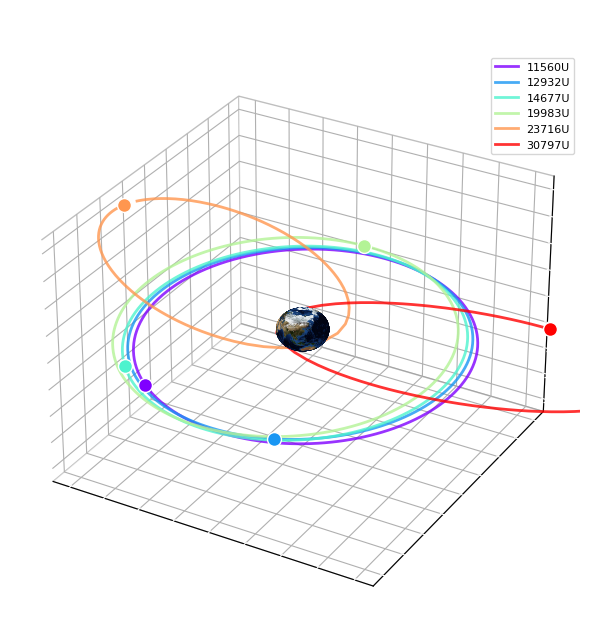

In [37]:
def tle_dict_to_lines(sat_data):
    """TLE dictionary'sini TLE string formatına çevirir"""
    line1_data = sat_data['line1']
    line2_data = sat_data['line2']
    
    # Line 1
    line1 = f"1 {line1_data['satellite_number']:5s}U {line1_data['int_designator_year']}{line1_data['int_designator_launch']}{line1_data['int_designator_piece']} "
    line1 += f"{line1_data['epoch_year']}{line1_data['epoch_day']:>12s} {line1_data['first_derivative']:>10s} "
    line1 += f"{line1_data['second_derivative']:>8s} {line1_data['bstar']:>8s} {line1_data['ephemeris_type']} {line1_data['element_set_number']:>4s}"
    
    # Line 2
    line2 = f"2 {line2_data['satellite_number']:5s} {line2_data['inclination']:>8s} {line2_data['raan']:>8s} "
    line2 += f"{line2_data['eccentricity']:>7s} {line2_data['arg_perigee']:>8s} {line2_data['mean_anomaly']:>8s} "
    line2 += f"{line2_data['mean_motion']:>11s}{line2_data['revolution_number']:>5s}"
    
    return line1, line2

def plot_satellite_orbits(final_filtered_objects, num_points=100, time_hours=24, 
                         earth_texture_path=None):
    """
    TLE verilerinden uydu yörüngelerini çizdirir (Dünya texture'ı ile)
    
    Parameters:
    - final_filtered_objects: TLE verilerini içeren dictionary
    - num_points: Yörünge çizimi için nokta sayısı
    - time_hours: Kaç saatlik yörünge çizilecek
    - earth_texture_path: Dünya texture dosyasının yolu (None ise otomatik indir)
    """
    
    # Skyfield zaman ölçeğini yükle
    ts = load.timescale()
    
    # 3D plot oluştur
    fig = plt.figure(figsize=(6, 10))
    ax = fig.add_subplot(111, projection='3d')
    
    # Dünya texture'ını yükle
    if earth_texture_path is None:
        earth_texture_path = download_earth_texture()
    
    if earth_texture_path:
        try:
            earth_img = image.imread(earth_texture_path)
        except:
            print("Texture yüklenemedi, düz renk kullanılacak")
            earth_img = None
    else:
        earth_img = None
    
    # Dünya küresini oluştur
    u = np.linspace(0, 2 * np.pi, 180)
    v = np.linspace(0, np.pi, 90)
    earth_radius = 6371  # km
    x_earth = earth_radius * np.outer(np.cos(u), np.sin(v))
    y_earth = earth_radius * np.outer(np.sin(u), np.sin(v))
    z_earth = earth_radius * np.outer(np.ones(np.size(u)), np.cos(v))
    
    # Texture'ı uygula
    if earth_img is not None:
        # Görüntüyü yeniden boyutlandır
        from scipy import ndimage
        img_resized = ndimage.zoom(earth_img, 
                                   (90/earth_img.shape[0], 
                                    180/earth_img.shape[1], 
                                    1))
        
        # Texture koordinatlarını hesapla
        colors = np.zeros((u.size, v.size, 3))
        for i in range(u.size):
            for j in range(v.size):
                colors[i, j] = img_resized[j, i] / 255.0
        
        ax.plot_surface(x_earth, y_earth, z_earth, 
                       rstride=1, cstride=1,
                       facecolors=colors,
                       shade=False, alpha=0.95, antialiased=True)
    else:
        # Texture yoksa basit küre çiz
        ax.plot_surface(x_earth, y_earth, z_earth, 
                       color='lightblue', alpha=0.3)
    
    # Her uydu için yörünge çiz
    colors = plt.cm.rainbow(np.linspace(0, 1, len(final_filtered_objects)))
    
    for idx, (sat_id, sat_data) in enumerate(final_filtered_objects.items()):
        try:
            # TLE stringlerini oluştur
            line1, line2 = tle_dict_to_lines(sat_data)
            
            # Uydu nesnesini oluştur
            satellite = EarthSatellite(line1, line2, sat_id, ts)
            
            # Zaman aralığı oluştur
            t_start = ts.now()
            times = ts.utc(
                t_start.utc.year,
                t_start.utc.month,
                t_start.utc.day,
                t_start.utc.hour,
                t_start.utc.minute,
                np.linspace(0, time_hours * 3600, num_points)
            )
            
            # Uydu pozisyonlarını hesapla
            geocentric = satellite.at(times)
            positions = geocentric.position.km
            
            # Yörüngeyi çiz
            ax.plot(positions[0], positions[1], positions[2], 
                   color=colors[idx], linewidth=2, label=f'{sat_id}', alpha=0.8)
            
            # Başlangıç noktasını işaretle
            ax.scatter(positions[0][0], positions[1][0], positions[2][0], 
                      color=colors[idx], s=100, marker='o', edgecolors='white', linewidths=1)
            
        except Exception as e:
            print(f"Uydu {sat_id} için hata: {e}")
            continue
    
    # Grafik ayarları
    ax.set_xlabel('X (km)', fontsize=12, fontweight='bold')
    ax.set_ylabel('Y (km)', fontsize=12, fontweight='bold')
    ax.set_zlabel('Z (km)', fontsize=12, fontweight='bold')
    ax.set_title(f'Uydu Yörüngeleri - Dünya ile ({time_hours} saat)', 
                fontsize=14, fontweight='bold', pad=20)
    
    # Eşit ölçek
    max_range = 45000  # km
    ax.set_xlim([-max_range, max_range])
    ax.set_ylim([-max_range, max_range])
    ax.set_zlim([-max_range, max_range])
    
    # Arka plan rengini ayarla
    ax.set_facecolor('white')
    fig.patch.set_facecolor('white')
    ax.xaxis.pane.set_facecolor('white')
    ax.yaxis.pane.set_facecolor('white')
    ax.zaxis.pane.set_facecolor('white')
    
    # Izgara rengini ayarla
    ax.xaxis.pane.set_edgecolor('gray')
    ax.yaxis.pane.set_edgecolor('gray')
    ax.zaxis.pane.set_edgecolor('gray')
    ax.grid(True, alpha=0.2, color='gray')
    
    # Eksen etiketlerini beyaz yap
    ax.tick_params(colors='white')
    ax.xaxis.label.set_color('white')
    ax.yaxis.label.set_color('white')
    ax.zaxis.label.set_color('white')
    ax.title.set_color('white')
    
    # Legend (çok fazla uydu varsa sadece ilk 10'unu göster)
    if len(final_filtered_objects) <= 10:
        legend = ax.legend(loc='upper right', fontsize=8, framealpha=0.8)
        legend.get_frame().set_facecolor('white')
        for text in legend.get_texts():
            text.set_color('black')
    else:
        print(f"Toplam {len(final_filtered_objects)} uydu çizildi")
    
    plt.tight_layout()
    plt.show()

# Kullanım örneği:
if __name__ == "__main__":
    # Eğer texture dosyanız zaten varsa:
    # plot_satellite_orbits(final_filtered_objects, num_points=150, time_hours=24, 
    #                      earth_texture_path='earth_texture.jpg')
    
    # Texture otomatik indirilsin:
    plot_satellite_orbits(final_filtered_objects, num_points=150, time_hours=24)

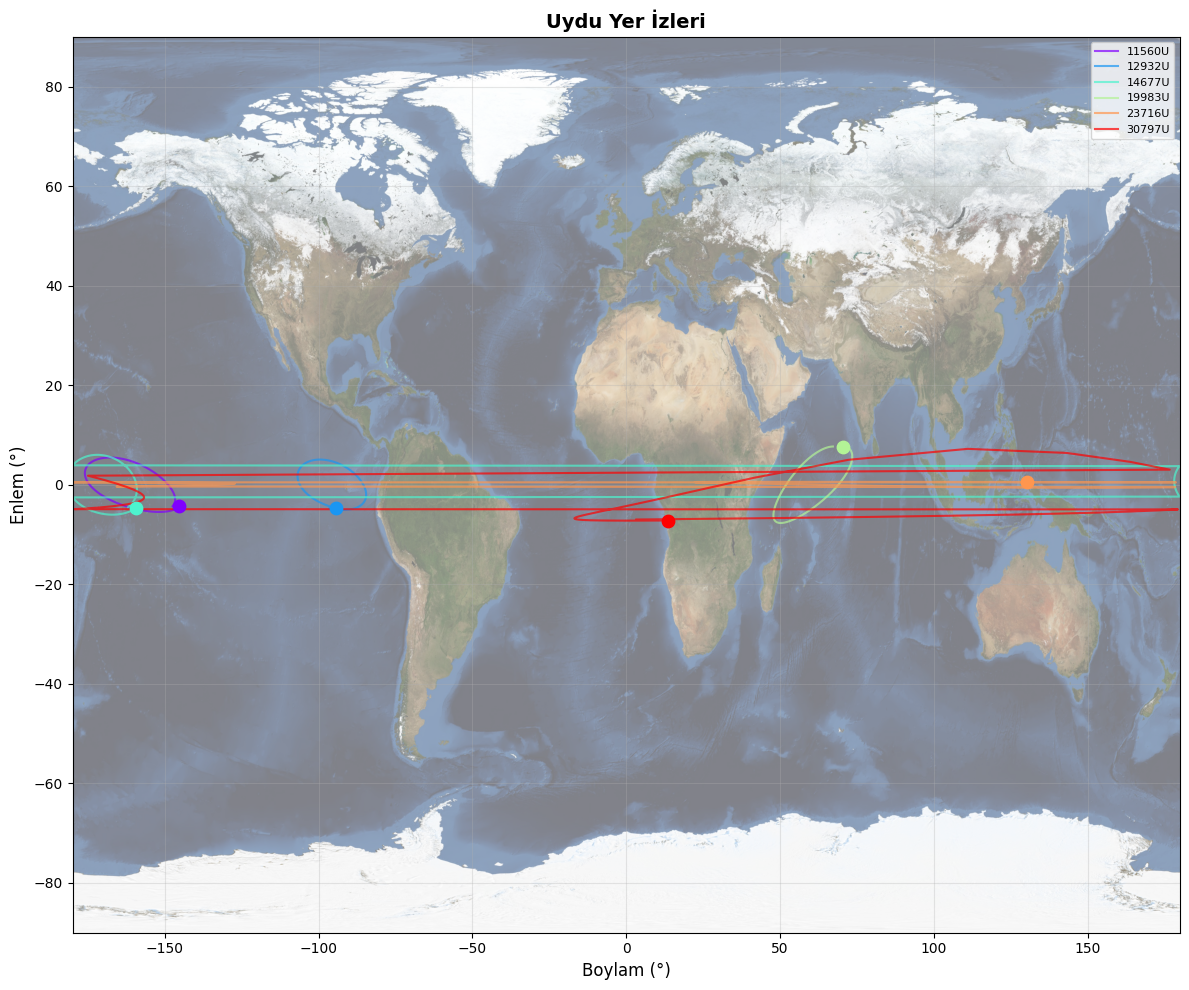

In [38]:
def plot_ground_track(final_filtered_objects, time_hours=24, num_points=200):
    """Objelerin Ground Track - 2D haritada gösterilir"""
    ts = load.timescale()
    
    fig, ax = plt.subplots(figsize=(12, 10))
    
    # Dünya haritası arkaplanı
    ax.set_xlim([-180, 180])
    ax.set_ylim([-90, 90])
    img = mpimg.imread('earth_texture.jpg')  # Arka plan resmi
    ax.imshow(img, extent=[-180, 180, -90, 90], aspect='auto', alpha=0.5)  # alpha ile transparanlık
    
    ax.set_xlabel('Boylam (°)', fontsize=12)
    ax.set_ylabel('Enlem (°)', fontsize=12)
    ax.set_title('Uydu Yer İzleri', fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    
    colors = plt.cm.rainbow(np.linspace(0, 1, len(final_filtered_objects)))
    
    for idx, (sat_id, sat_data) in enumerate(final_filtered_objects.items()):
        try:
            # TLE satırlarını al
            line1, line2 = tle_dict_to_lines(sat_data)
            satellite = EarthSatellite(line1, line2, sat_id, ts)
            
            # Zaman aralığı
            t_start = ts.now()
            times = ts.utc(
                t_start.utc.year,
                t_start.utc.month,
                t_start.utc.day,
                t_start.utc.hour,
                t_start.utc.minute,
                np.linspace(0, time_hours * 3600, num_points)
            )
            
            geocentric = satellite.at(times)
            subpoint = wgs84.subpoint(geocentric)
            
            lats = subpoint.latitude.degrees
            lons = subpoint.longitude.degrees
            
            # Uydu izlerini çiz
            ax.plot(lons, lats, color=colors[idx], linewidth=1.5, label=f'{sat_id}', alpha=0.7)
            ax.scatter(lons[0], lats[0], color=colors[idx], s=80, marker='o', zorder=5)  # Başlangıç noktası
        except Exception as e:
            print(f"Uydu {sat_id} için hata: {e}")
            continue
    
    if len(final_filtered_objects) <= 10:
        ax.legend(loc='upper right', fontsize=8)
    
    plt.tight_layout()
    plt.show()


# Kullanım örneği
if __name__ == "__main__":
    # final_filtered_objects değişkenini buraya geçirin
    plot_ground_track(final_filtered_objects, time_hours=24, num_points=200)